# Classification of digits - flat features

Objective: Learn the basics of applying ML model to classify digits

* Spliting data for train and test
* fit, predict, and fit_transform functions in scikit-learn
* Dimentionality reduction

## Get the data
#### Available data in scikit-learn

* Packaged Data: Small datasets comes with scikit-learn installation. You can download these datasets as import sklearn.datasets.load_*
* Downloadable Data: Relatively larger datasets that are downloaded using the stream line tools sklearn.datasets.fetch_*
* Generated Data: Generated from models based on a random seed. These are available in the sklearn.datasets.make_*

In [1]:
from sklearn import datasets

In [2]:
# Type datasets.fetch_<TAB> or datasets.load_<TAB> in IPython to see all possibilities
#datasets.load_

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Data exploration

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

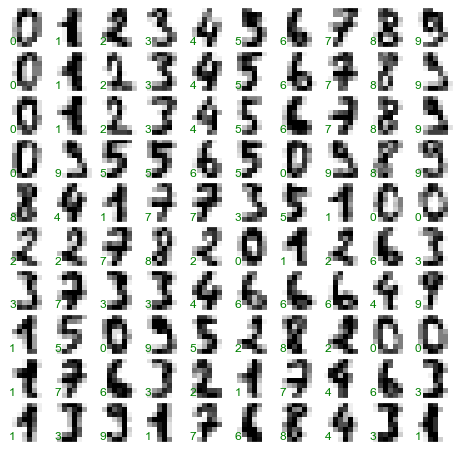

In [7]:

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [8]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [9]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [10]:
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


Text(0, 0.5, 'Frequency')

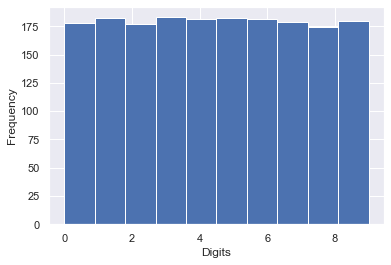

In [11]:
plt.hist(digits.target)
plt.xlabel('Digits')
plt.ylabel('Frequency')

## Problem definition 
* Supervised or Unsupervised? 
* Classification or Regression? 
* Is the data enough for ML or DL?
* Is the data represents the problem (or distribution)? 
* what features are import? (not considered in this example)

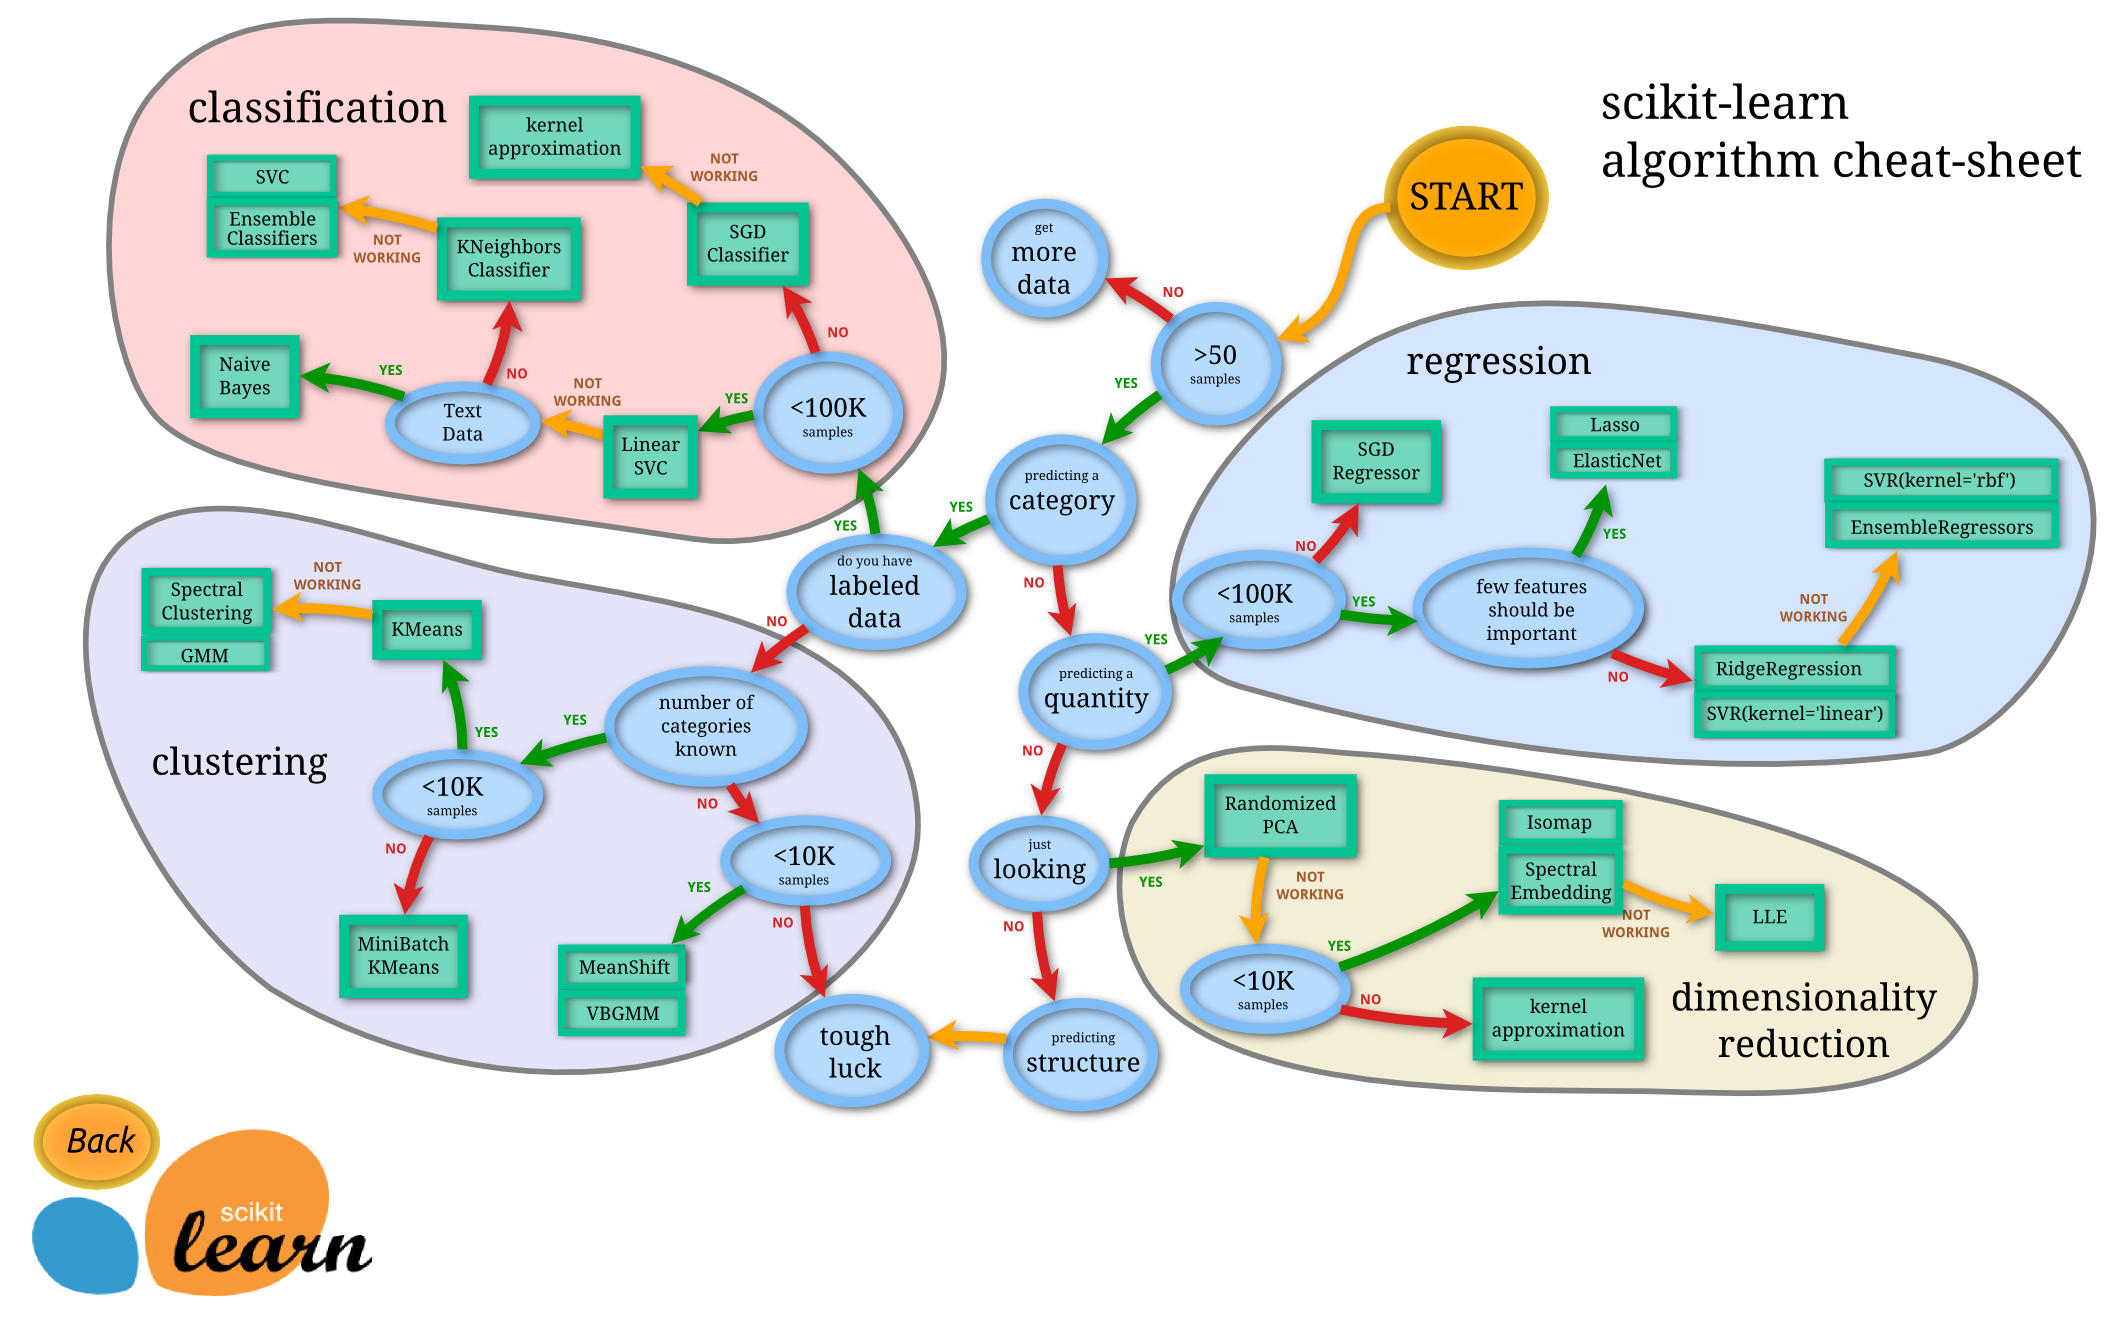

In [12]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")

### Classification of Digits

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=3)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg',multi_class='auto')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9422222222222222

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  2  0]
 [ 0  1 44  1  0  0  0  0  0  0]
 [ 0  0  1 46  0  0  0  0  1  0]
 [ 0  6  0  0 47  0  0  1  1  0]
 [ 0  1  0  0  1 35  0  0  0  4]
 [ 0  1  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  1  0  1  2 29]]


<ipython-input-17-e2e855b1e5ef>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(ytest, ypred)),


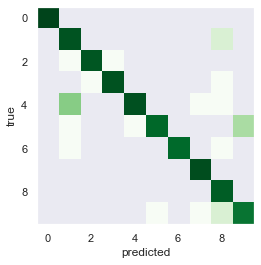

In [17]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Greens', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

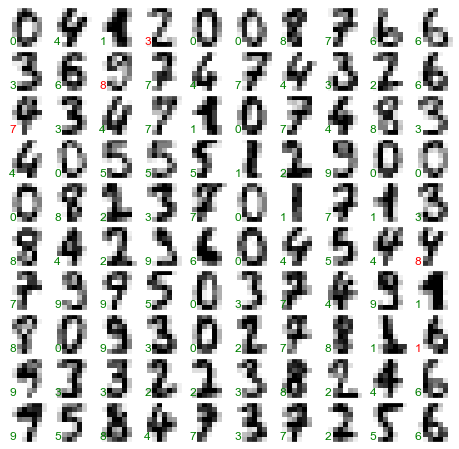

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=12)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

accuracy_score(ytest, ypred)

0.8688888888888889

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

accuracy_score(ytest, ypred)


0.9733333333333334

### Dimentionality Reduction

In [21]:
from sklearn.decomposition import PCA

# Create a regular PCA model 
pca = PCA(n_components=20)

# Fit and transform the data to the model
reduced_data = pca.fit_transform(digits.data)

# Inspect the shape
print(reduced_data.shape)

# Print out the data
#print(reduced_data)

(1797, 20)


In [22]:
def plot_digits(X1, X2, Val, red_method=""):
    colors = ['black', 'blue', 'purple', 'indigo', 'firebrick', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        x1_val = X1[:][Val == i]
        x2_val = X2[:][Val == i]
        plt.scatter(x1_val, x2_val, c=colors[i], marker="$"+str(i)+"$",s =60, alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(red_method)
    plt.show()

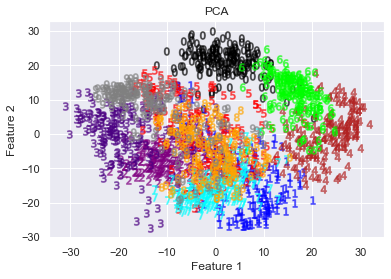

In [23]:
plot_digits(reduced_data[:,0], reduced_data[:,1], digits.target, "PCA")

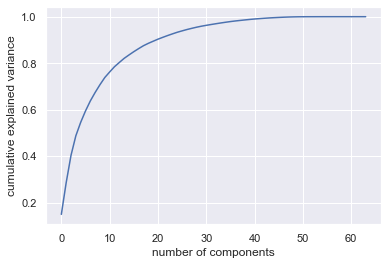

In [24]:
pca = PCA()
reduced_data_pca = pca.fit(digits.data)
plt.plot(np.cumsum(reduced_data_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [25]:
pca = PCA(0.50)
reduced_data = pca.fit(digits.data)
print(reduced_data.n_components_)
#print(reduced_data_pca.shape)


5


#### Isomap

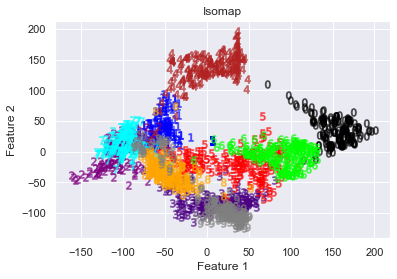

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=4)
reduced_data = iso.fit_transform(digits.data)
plot_digits(reduced_data[:,0], reduced_data[:,1], digits.target, "Isomap")

#### t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE transforms linking between point which is represented by Gaussian joint probabilities to student's t-distributions in embedded space. t-SNE tries to group samples based on their local structure. 


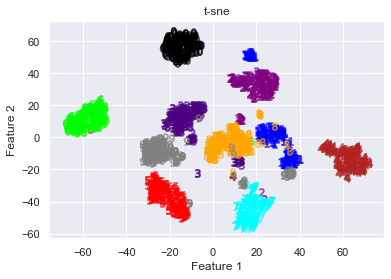

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=51)
reduced_data = tsne.fit_transform(digits.data)
plot_digits(reduced_data[:,0], reduced_data[:,1], digits.target, "t-sne")

### Performance of Dimensionality Reduction Algorithms 
Below we have designed a method named test_model which takes as input classifier, data, and labels as input. It then divides data into train/test sets, train a classifier on train data, and evaluate it on both train & test data. It prints the accuracy of the classifier on both train and test data.

In [28]:
from sklearn.model_selection import train_test_split
def test_model(classifier, X, Y, red_method=""):
    #classifier = LogisticRegression(solver='newton-cg',multi_class='auto')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=11)
    print(" Shape : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    classifier.fit(X_train, Y_train)
    print(" ")
    print("Dimensionlity Reduction method=", red_method)
    print('Train Accuracy : %.2f, Test Accuracy : %.2f'%(classifier.score(X_train, Y_train), classifier.score(X_test, Y_test)))
    

In [29]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
test_model(clf, digits.data, digits.target, red_method="Full Data")


 Shape :  (1257, 64) (540, 64) (1257,) (540,)
 
Dimensionlity Reduction method= Full Data
Train Accuracy : 1.00, Test Accuracy : 0.97


In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=51)
reduced_data = tsne.fit_transform(digits.data)
test_model(clf, reduced_data, digits.target, red_method="T-SNE")

 Shape :  (1257, 2) (540, 2) (1257,) (540,)
 
Dimensionlity Reduction method= T-SNE
Train Accuracy : 1.00, Test Accuracy : 0.98


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(digits.data)
test_model(clf, reduced_data, digits.target, red_method="PCA")

 Shape :  (1257, 2) (540, 2) (1257,) (540,)
 
Dimensionlity Reduction method= PCA
Train Accuracy : 1.00, Test Accuracy : 0.62


In [32]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
reduced_data = iso.fit_transform(digits.data)
test_model(clf, reduced_data, digits.target, red_method="Isomap")

 Shape :  (1257, 2) (540, 2) (1257,) (540,)
 
Dimensionlity Reduction method= Isomap
Train Accuracy : 1.00, Test Accuracy : 0.80


## Observation

* Data - Spliting data for test and train, Dimensionality reduction, and Feature selection. 
* Model - Algorithm and the parameter choices. 